In [1]:
import sys
import os
import random
from collections import Counter
import numpy as np
# Package
import somhos.resources.dataset as rd
import somhos.resources.queries as rq
from somhos.methods.useful import save_pickle, load_pickle
from somhos.config.paths import *

Default path

In [2]:
data_path = "../../src/somhos/resources/aminer/v9"

Load samples

In [3]:
# Load sample A
docs_sample_a_path = get_relative_path(data_path, DOCS_SAMPLE_A_SUFFIX)
docs_sample_a = load_pickle(docs_sample_a_path)
# Load sample B
docs_sample_b_path = get_relative_path(data_path, DOCS_SAMPLE_B_SUFFIX)
docs_sample_b = load_pickle(docs_sample_b_path)

print("Samples size: (%d, %d)" % (len(docs_sample_a), len(docs_sample_b)))

Samples size: (1000, 1000)


Load samples content

In [4]:
docs_samples_content_path = get_relative_path(data_path, DOCS_SAMPLES_CONTENT)
samples_content = load_pickle(docs_samples_content_path)
print("Docs: %d" % len(samples_content))

Docs: 2000


Load Jaccard similarities

In [5]:
docs_samples_jaccard_sim_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM)
m_jaccard_sim = load_pickle(docs_samples_jaccard_sim_path)
print(m_jaccard_sim)

[[0.03292181 0.03518519 0.00714286 ... 0.04385965 0.02083333 0.04580153]
 [0.04471545 0.0291439  0.02797203 ... 0.05627706 0.00657895 0.03623188]
 [0.03508772 0.02448211 0.008      ... 0.04205607 0.04761905 0.05172414]
 ...
 [0.03508772 0.01492537 0.02439024 ... 0.04205607 0.03125    0.02521008]
 [0.0361991  0.03468208 0.01709402 ... 0.04854369 0.02459016 0.        ]
 [0.05172414 0.01845018 0.         ... 0.03125    0.02189781 0.03174603]]


In [6]:
docs_samples_jaccard_sim_udv_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_UDV)
m_udv_jaccard_sim = load_pickle(docs_samples_jaccard_sim_udv_path)
print(m_udv_jaccard_sim)

[[0.04361271 0.0460296  0.02870448 ... 0.04959599 0.02688767 0.03650811]
 [0.03771801 0.03980823 0.02482477 ... 0.04289259 0.02325353 0.03157367]
 [0.04338416 0.04578839 0.02855405 ... 0.04933609 0.02674677 0.03631679]
 ...
 [0.03332177 0.03516837 0.02193131 ... 0.03789323 0.02054321 0.02789359]
 [0.03247137 0.03427084 0.02137161 ... 0.03692616 0.02001893 0.02718172]
 [0.03512217 0.03706854 0.02311628 ... 0.03994062 0.02165317 0.02940069]]


In [7]:
docs_samples_jaccard_sim_kps_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_KPS)
m_jaccard_sim_kps = load_pickle(docs_samples_jaccard_sim_kps_path)
print(m_jaccard_sim_kps)

[[0.         0.         0.         ... 0.01960784 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01785714 0.         0.02857143]
 ...
 [0.         0.         0.         ... 0.         0.03846154 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.02040816 0.         0.         ... 0.         0.         0.        ]]


In [8]:
docs_samples_jaccard_sim_udv_kps_path = get_relative_path(data_path, DOCS_SAMPLES_JACCARD_SIM_UDV_KPS)
m_udv_jaccard_sim_kps = load_pickle(docs_samples_jaccard_sim_udv_kps_path)
print(m_udv_jaccard_sim_kps)

[[0.00088732 0.00074947 0.00072513 ... 0.00090514 0.00039251 0.00080765]
 [0.00178591 0.00150847 0.00145948 ... 0.00182178 0.00079    0.00162555]
 [0.00490652 0.00414428 0.00400969 ... 0.00500508 0.00217041 0.00446596]
 ...
 [0.00330685 0.00279312 0.00270241 ... 0.00337327 0.00146279 0.00300993]
 [0.00058503 0.00049415 0.0004781  ... 0.00059678 0.00025879 0.0005325 ]
 [0.00360416 0.00304425 0.00294538 ... 0.00367656 0.00159431 0.00328055]]


In [9]:
docs_samples_tf_idf_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF)
m_tf_idf = load_pickle(docs_samples_tf_idf_path)
print(m_tf_idf)

[[0.00750679 0.01106243 0.00031596 ... 0.00968403 0.0032995  0.00496262]
 [0.0157523  0.01400749 0.03310009 ... 0.01981849 0.00143613 0.00954822]
 [0.00522653 0.00838618 0.00083333 ... 0.02829378 0.00507733 0.01066712]
 ...
 [0.0074064  0.00825712 0.00714255 ... 0.01280274 0.00424296 0.00496312]
 [0.00849982 0.01319539 0.00128268 ... 0.02281991 0.00201917 0.        ]
 [0.01844931 0.00421175 0.         ... 0.01321121 0.00665555 0.00863887]]


In [10]:
docs_samples_tf_idf_udv_path = get_relative_path(data_path, DOCS_SAMPLES_TF_IDF_UDV)
m_udv_tf_idf = load_pickle(docs_samples_tf_idf_udv_path)
print(m_udv_tf_idf)

[[0.01353857 0.02039515 0.0128373  ... 0.02081429 0.00554584 0.00883632]
 [0.01443389 0.02174391 0.01368625 ... 0.02219076 0.00591259 0.00942068]
 [0.01512196 0.02278044 0.01433868 ... 0.0232486  0.00619445 0.00986976]
 ...
 [0.01451197 0.02186152 0.01376028 ... 0.02231079 0.00594457 0.00947163]
 [0.0078894  0.01188498 0.00748075 ... 0.01212922 0.00323176 0.00514924]
 [0.0144247  0.02173006 0.01367753 ... 0.02217663 0.00590883 0.00941468]]


In [11]:
docs_samples_word2vec_sim_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM)
m_word2vec_sim = load_pickle(docs_samples_word2vec_sim_path)
print(m_word2vec_sim)

[[0.86534196 0.86278559 0.79227646 ... 0.86958995 0.79866438 0.81544963]
 [0.87643462 0.89360271 0.83657274 ... 0.90201855 0.80954968 0.86228529]
 [0.84398758 0.84359904 0.83315985 ... 0.85875672 0.79936952 0.86560457]
 ...
 [0.81910398 0.82330639 0.78677141 ... 0.83295354 0.76034818 0.88402544]
 [0.83766927 0.85300346 0.71587968 ... 0.85768615 0.75476113 0.79618026]
 [0.84980335 0.82969595 0.79795486 ... 0.85606399 0.77727514 0.86805362]]


In [12]:
docs_samples_word2vec_sim_udv_path = get_relative_path(data_path, DOCS_SAMPLES_WORD2VEC_SIM_UDV)
m_udv_word2vec_sim = load_pickle(docs_samples_word2vec_sim_udv_path)
print(m_udv_word2vec_sim)

[[0.86128099 0.87603515 0.79645275 ... 0.87464476 0.78405023 0.83869546]
 [0.8768267  0.89184716 0.81082834 ... 0.89043168 0.79820196 0.85383351]
 [0.86250937 0.87728458 0.79758868 ... 0.8758922  0.78516846 0.83989163]
 ...
 [0.83569109 0.85000688 0.77278899 ... 0.8486578  0.76075496 0.81377661]
 [0.83460778 0.84890502 0.77178723 ... 0.84755769 0.7597688  0.81272171]
 [0.85664297 0.87131768 0.79216384 ... 0.86993478 0.7798281  0.83417907]]


Means of jaccard similarities

In [13]:
m_ref = m_jaccard_sim_kps
# Means sample a
means_sample_a = np.divide(np.sum(m_ref, axis=1), len(docs_sample_b))
# Means sample b
means_sample_b = np.divide(np.sum(m_ref, axis=0), len(docs_sample_a))
# Ordered means
ordered_indices_m = means_sample_a.argsort()[::-1]
ordered_indices_n = means_sample_b.argsort()[::-1]

Order matrices by means

In [14]:
m_jaccard_sim = m_jaccard_sim[ordered_indices_m,:][:,ordered_indices_n]
m_udv_jaccard_sim = m_udv_jaccard_sim[ordered_indices_m,:][:,ordered_indices_n]
m_jaccard_sim_kps = m_jaccard_sim_kps[ordered_indices_m,:][:,ordered_indices_n]
m_udv_jaccard_sim_kps = m_udv_jaccard_sim_kps[ordered_indices_m,:][:,ordered_indices_n]

m_tf_idf = m_tf_idf[ordered_indices_m,:][:,ordered_indices_n]
m_udv_tf_idf = m_udv_tf_idf[ordered_indices_m,:][:,ordered_indices_n]
# Word2vec
m_word2vec_sim = m_word2vec_sim[ordered_indices_m,:][:,ordered_indices_n]
m_udv_word2vec_sim = m_udv_word2vec_sim[ordered_indices_m,:][:,ordered_indices_n]

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams["figure.figsize"] = (16,16)
mpl.rcParams['figure.dpi']= 250
mpl.rcParams['image.cmap'] = 'jet'
mpl.rcParams['image.interpolation'] = 'none'
mpl.rcParams['image.lut'] = 0
mpl.rcParams['image.resample'] = False

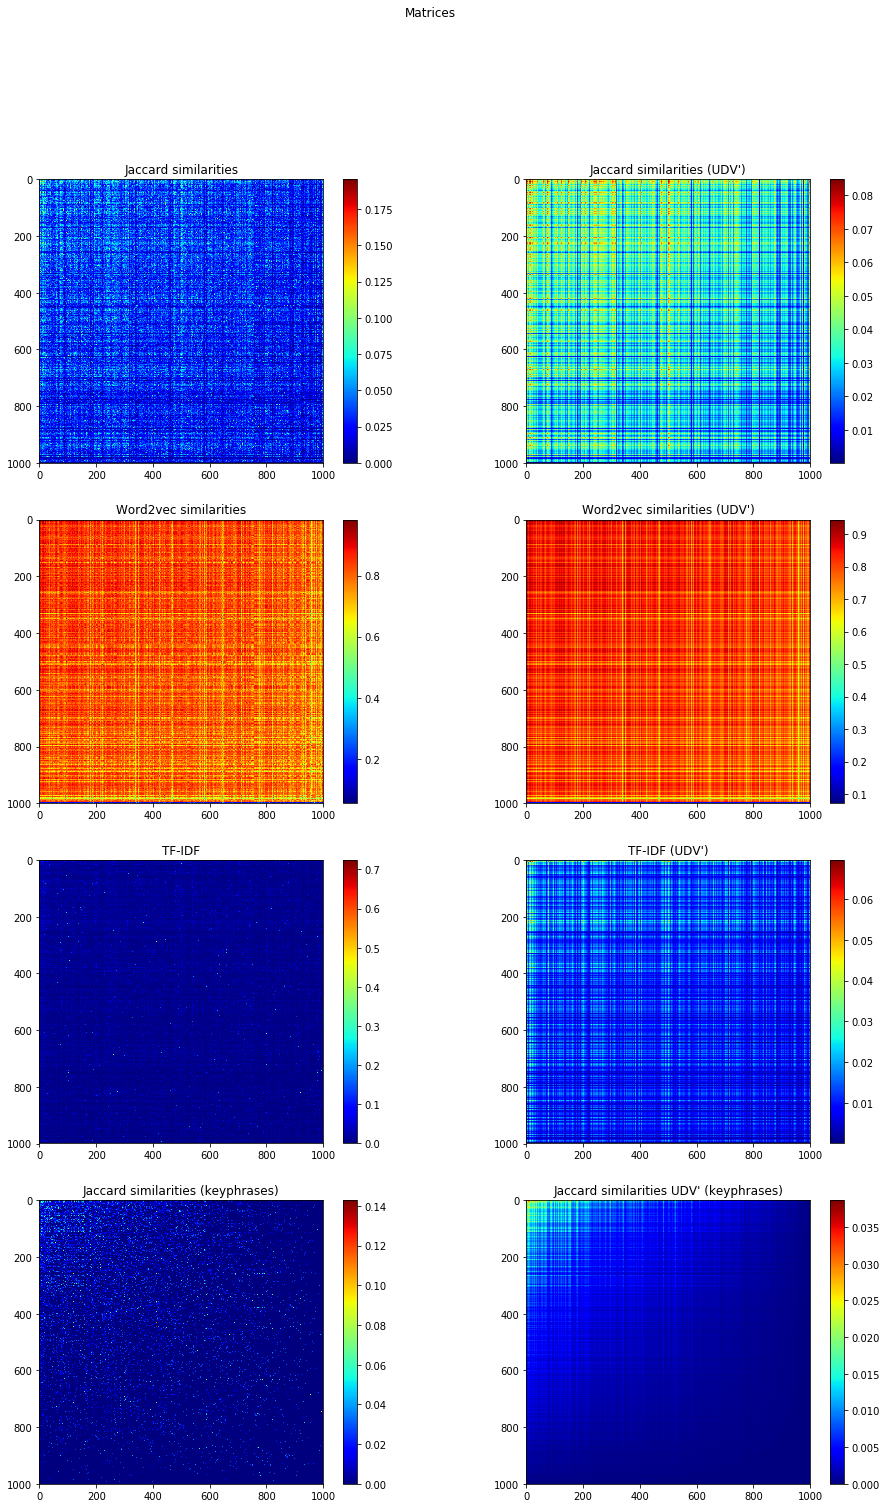

In [25]:
fig = plt.figure(figsize=(16, 24))
fig.suptitle("Matrices")

# Words
ax_jaccard_sim = plt.subplot(4, 2, 1)
ax_jaccard_sim.set_title("Jaccard similarities")
im_jaccard_sim = ax_jaccard_sim.imshow(m_jaccard_sim)
plt.colorbar(im_jaccard_sim)
# Reconstructed matrix using the largest singular value.
ax_jaccard_sim_udv = plt.subplot(4, 2, 2)
ax_jaccard_sim_udv.set_title("Jaccard similarities (UDV')")
im_jaccard_sim_udv = ax_jaccard_sim_udv.imshow(m_udv_jaccard_sim)
plt.colorbar(im_jaccard_sim_udv)

#Word2vec
ax_word2vec_sim = plt.subplot(4, 2, 3)
ax_word2vec_sim.set_title("Word2vec similarities")
im_word2vec_sim = ax_word2vec_sim.imshow(m_word2vec_sim)
plt.colorbar(im_word2vec_sim)
# Reconstructed matrix using the largest singular value.
ax_word2vec_sim_udv = plt.subplot(4, 2, 4)
ax_word2vec_sim_udv.set_title("Word2vec similarities (UDV')")
im_word2vec_sim_udv = ax_word2vec_sim_udv.imshow(m_udv_word2vec_sim)
plt.colorbar(im_word2vec_sim_udv)

ax_tf_idf = plt.subplot(4, 2, 5)
ax_tf_idf.set_title("TF-IDF")
im_tf_idf = ax_tf_idf.imshow(m_tf_idf)
plt.colorbar(im_tf_idf)
# Reconstructed matrix using the largest singular value.
ax_tf_idf_udv = plt.subplot(4, 2, 6)
ax_tf_idf_udv.set_title("TF-IDF (UDV')")
im_tf_idf_udv = ax_tf_idf_udv.imshow(m_udv_tf_idf)
plt.colorbar(im_tf_idf_udv)

# Keyphrases
ax_jaccard_sim_kps = plt.subplot(4, 2, 7)
ax_jaccard_sim_kps.set_title("Jaccard similarities (keyphrases)")
im_jaccard_sim_kps = ax_jaccard_sim_kps.imshow(m_jaccard_sim_kps)
plt.colorbar(im_jaccard_sim_kps)
# Reconstructed matrix using the largest singular value.
ax_jaccard_sim_udv_kps = plt.subplot(4, 2, 8)
ax_jaccard_sim_udv_kps.set_title("Jaccard similarities UDV' (keyphrases)")
im_jaccard_sim_udv_kps = ax_jaccard_sim_udv_kps.imshow(m_udv_jaccard_sim_kps)
plt.colorbar(im_jaccard_sim_udv_kps)

# l b w h 
# cax = plt.axes([0.98, 0.1, 0.05, 0.8])
# plt.colorbar(im_jaccard_sim, cax=cax)
plt.show()

Get content

In [ ]:
docs_samples_content_path = get_relative_path(data_path, DOCS_SAMPLES_CONTENT)
samples_content = load_pickle(docs_samples_content_path)
print("Docs: %d" % len(samples_content))

Order docs and get less similar

In [ ]:
docs_a = list(np.array(docs_sample_a)[ordered_indices_m])
docs_b = list(np.array(docs_sample_b)[ordered_indices_n])
start_offset = 0
end_offset = start_offset + 10

for doc_a in docs_a[start_offset:end_offset]:
    for doc_b in docs_b[start_offset:end_offset]:
        content_a = samples_content[doc_a]
        content_b = samples_content[doc_b]
        i = docs_a.index(doc_a)
        j = docs_b.index(doc_b)
        # bow
        # bow = content_a['bag-of-words'] | content_b['bag-of-words']
        # kps
        # bok = content_a['bag-of-kps'] | content_b['bag-of-kps']
        # if m_jaccard_sim_kps[i,j] == 0.0 or len(bok) <= 6:
        #     continue
        # print("(%d, %d) = %f b-o-w" % (i, j, m_jaccard_sim[i,j]), bow if bow else "")
        # print("(%d, %d) = %f b-o-k" % (i, j, m_jaccard_sim_kps[i,j]), bok if bok else "")
        print(" (%f, %f, %f) | %s | %s" % (m_jaccard_sim[i,j], m_jaccard_sim_kps[i,j], m_word2vec_sim[i,j], content_a['title'], content_b['title']))
        print("-------")